In [1]:
#https://www.tensorflow.org/tutorials/keras/regression
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
data_rd = pd.read_csv("data_rd.csv")
data_po = pd.read_csv("data_po.csv")

def learn_eq(data):
    batch = data.shape[0]
    c = data['label'].max()
    k = 2 #number of covariates
    n = 2 #number of hidden nodes

    example_batch = np.array(data[['x1','x2']])
    example_classify =  np.array(data['label']) -1
    
    hidden_layer = tf.keras.layers.Dense(n, kernel_initializer='ones',
                          bias_initializer='ones', activation='sigmoid', input_shape=(k,))


    linear_activation = lambda x: tf.keras.activations.relu(x, alpha=1.0)
    log_odds = tf.keras.layers.Dense(c, kernel_initializer='ones',
                              bias_initializer='ones', activation=linear_activation, input_shape=(n,))


    model = tf.keras.Sequential([hidden_layer, log_odds, tf.keras.layers.Softmax()])


    scce = tf.keras.losses.SparseCategoricalCrossentropy()
    pred = model.apply(example_batch) #note calculated using natural log...

    #train model
    sgd_fast = tf.keras.optimizers.SGD(learning_rate=0.5)

    model.compile(loss=scce, optimizer=sgd_fast)
    model.fit(example_batch, example_classify, verbose=0, epochs=10)
    
    pred = model.apply(np.ones((1,2))) #note calculated using natural log...
    pred = 1000*np.array(pred)[0,:]
    tf.keras.backend.clear_session()
    return pred

pred_rd = learn_eq(data_rd)
pred_po = learn_eq(data_po)


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



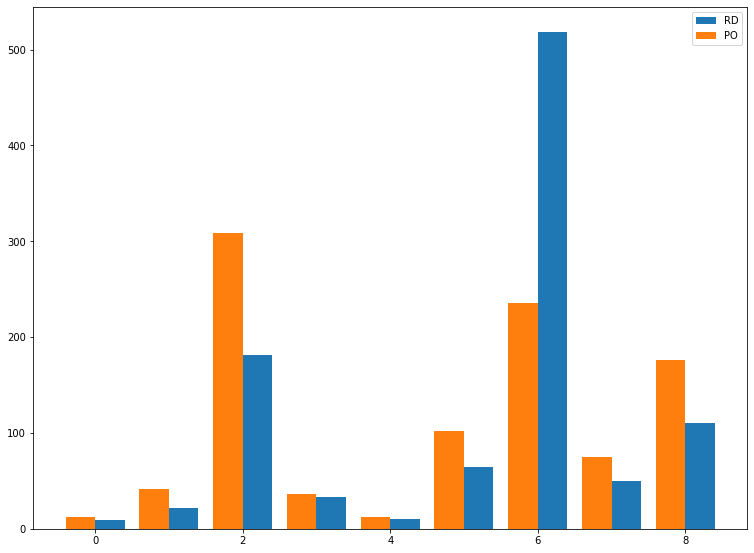

In [6]:
#predict
label_rd = np.arange(0,9) + .2
label_po = np.arange(0,9) - .2

plt.bar(label_rd, pred_rd, label="RD",width=.4)
plt.bar(label_po, pred_po, label="PO",width=.4)

new_size = tuple(2*np.array([6.4,4.8]))
plt.gcf().set_size_inches(new_size)
plt.legend()
plt.show()

In [ ]:
tf.keras.backend.clear_session()